In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

import datasets

In [92]:

data_x1 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_1.csv")
data_x2 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_2.csv")
data_x3 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_3.csv")
data_x4 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_4.csv")
data_x5 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_5.csv")
data_source = pd.read_csv("calibration_and_background_method1/spectrum_source.csv")
data_background = pd.read_csv("calibration_and_background_method1/spectrum_background.csv")

data_y1 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_1.csv")
data_y2 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_2.csv")
data_y3 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_3.csv")
data_y4 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_4.csv")


all functions needed in program

In [93]:
def adjust(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 211.8 and i < 215.7:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

def remove_background(dataset, dataset_2):
    data = []
    
    for i, j in zip(dataset, dataset_2):
        x = i - j
        data.append(x)
    
    return data

def scaling(dataset, scaling_factor):
    data = []
    for i in dataset:
        data.append(i * scaling_factor)
    return data
    

remove background from measured data

In [94]:
pulseheights_background = data_background["pulseheight"]
counts_background_A = data_background["counts_ch_A"]
counts_background_B = data_background["counts_ch_B"]

counts_A_x1 = remove_background(data_x1["counts_ch_A"], counts_background_A)
counts_B_x1 = remove_background(data_x1["counts_ch_B"], counts_background_B)

counts_A_x2 = remove_background(data_x2["counts_ch_A"], counts_background_A)
counts_B_x2 = remove_background(data_x2["counts_ch_B"], counts_background_B)

counts_A_x3 = remove_background(data_x3["counts_ch_A"], counts_background_A)
counts_B_x3 = remove_background(data_x3["counts_ch_B"], counts_background_B)

counts_A_x4 = remove_background(data_x4["counts_ch_A"], counts_background_A)
counts_B_x4 = remove_background(data_x4["counts_ch_B"], counts_background_B)

counts_A_x5 = remove_background(data_x5["counts_ch_A"], counts_background_A)
counts_B_x5 = remove_background(data_x5["counts_ch_B"], counts_background_B)

pulseheights = data_source["pulseheight"]
counts_A_source = remove_background(data_source["counts_ch_A"], counts_background_A)
counts_B_source = remove_background(data_source["counts_ch_B"], counts_background_B)


In [95]:

counts_A_y1 = remove_background(data_y1["counts_ch_A"], counts_background_A)
counts_B_y1 = remove_background(data_y1["counts_ch_B"], counts_background_B)

counts_A_y2 = remove_background(data_y2["counts_ch_A"], counts_background_A)
counts_B_y2 = remove_background(data_y2["counts_ch_B"], counts_background_B)

counts_A_y3 = remove_background(data_y3["counts_ch_A"], counts_background_A)
counts_B_y3 = remove_background(data_y3["counts_ch_B"], counts_background_B)

counts_A_y4 = remove_background(data_y4["counts_ch_A"], counts_background_A)
counts_B_y4 = remove_background(data_y4["counts_ch_B"], counts_background_B)

Calculate scaling factor

In [96]:
scaling_factor = max(counts_A_source) / max(counts_B_source)
print(scaling_factor)

1.1898332009531374


apply scaling factor to data sets

In [97]:
counts_B_x1 = scaling(counts_B_x1, scaling_factor)
counts_B_x2 = scaling(counts_B_x2, scaling_factor)
counts_B_x3 = scaling(counts_B_x3, scaling_factor)
counts_B_x4 = scaling(counts_B_x4, scaling_factor)
counts_B_x5 = scaling(counts_B_x5, scaling_factor)

counts_B_y1 = scaling(counts_B_y1, scaling_factor)
counts_B_y2 = scaling(counts_B_y2, scaling_factor)
counts_B_y3 = scaling(counts_B_y3, scaling_factor)
counts_B_y4 = scaling(counts_B_y4, scaling_factor)

counts_B_source = scaling(counts_B_source, scaling_factor)

adjust data to 511 KeV peak to look at intensity coming only from positron electron annihilation for x and y measurements

In [98]:

_, counts_A_x1 = adjust(pulseheights, counts_A_x1)
_, counts_B_x1 = adjust(pulseheights, counts_B_x1)
_, counts_A_x2 = adjust(pulseheights, counts_A_x2)
_, counts_B_x2 = adjust(pulseheights, counts_B_x2)
_, counts_A_x3 = adjust(pulseheights, counts_A_x3)
_, counts_B_x3 = adjust(pulseheights, counts_B_x3)
_, counts_A_x4 = adjust(pulseheights, counts_A_x4)
_, counts_B_x4 = adjust(pulseheights, counts_B_x4)
_, counts_A_x5 = adjust(pulseheights, counts_A_x5)
_, counts_B_x5 = adjust(pulseheights, counts_B_x5)

x1_counts = [sum(counts_A_x1) + sum(counts_B_x1)]
x2_counts = [sum(counts_A_x2) + sum(counts_B_x2)]
x3_counts = [sum(counts_A_x3) + sum(counts_B_x3)]
x4_counts = [sum(counts_A_x4) + sum(counts_B_x4)]
x5_counts = [sum(counts_A_x5) + sum(counts_B_x5)]

x_counts = [x1_counts, x2_counts, x3_counts, x4_counts, x5_counts]



In [99]:

_, counts_A_y1 = adjust(pulseheights, counts_A_y1)
_, counts_B_y1 = adjust(pulseheights, counts_B_y1)
_, counts_A_y2 = adjust(pulseheights, counts_A_y2)
_, counts_B_y2 = adjust(pulseheights, counts_B_y2)
_, counts_A_y3 = adjust(pulseheights, counts_A_y3)
_, counts_B_y3 = adjust(pulseheights, counts_B_y3)
_, counts_A_y4 = adjust(pulseheights, counts_A_y4)
_, counts_B_y4 = adjust(pulseheights, counts_B_y4)

y1_counts = [sum(counts_A_y1) + sum(counts_B_y1)]
y2_counts = [sum(counts_A_y2) + sum(counts_B_y2)]
y3_counts = [sum(counts_A_y3) + sum(counts_B_y3)]
y4_counts = [sum(counts_A_y4) + sum(counts_B_y4)]

y_counts = [y1_counts, y2_counts, y3_counts, y4_counts]


making heatmap with total amount of peak counts per x and y location

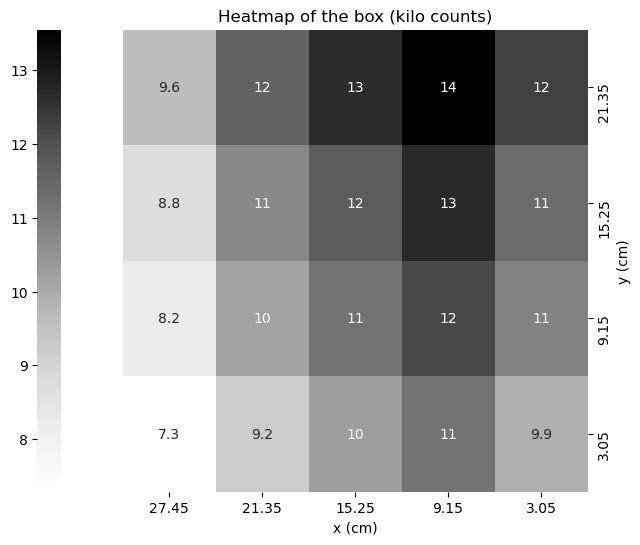

In [100]:
x_positions = np.array([3.05, 9.15, 15.25, 21.35, 27.45]) 
y_positions = np.array([3.05, 9.15, 15.25, 21.35])

# total amount of counts at location (xi, yi) is the sum of counts_xi and counts_yi
counts = np.array([
    [x1_counts[0] + y1_counts[0], x2_counts[0] + y1_counts[0], x3_counts[0] + y1_counts[0], 
     x4_counts[0] + y1_counts[0], x5_counts[0] + y1_counts[0]],  
    [x1_counts[0] + y2_counts[0], x2_counts[0] + y2_counts[0], x3_counts[0] + y2_counts[0], x4_counts[0]
     + y2_counts[0], x5_counts[0] + y2_counts[0]],  
    [x1_counts[0] + y3_counts[0], x2_counts[0] + y3_counts[0], x3_counts[0] + y3_counts[0], x4_counts[0]
     + y3_counts[0], x5_counts[0] + y3_counts[0]],  
    [x1_counts[0] + y4_counts[0], x2_counts[0] + y4_counts[0], x3_counts[0] + y4_counts[0], x4_counts[0]
     + y4_counts[0], x5_counts[0] + y4_counts[0]] 
])

# scale to kilo counts for easier reading
counts = counts / 1000

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box (kilo counts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

plt.show()


Filtering out the intensity coming from dominant source (x = 9.15, y = 21.35) to find other 2 sources

In [101]:
counts_source =  (x2_counts[0] + y4_counts[0]) / 1000 #kilo counts
counts_source_box = []

# every x, y position dominant source as origin
ry_positions = [-18.3, -12.2, -6.1, 0]
rx_positions = [-6.1, 0, 6.1, 12.2, 18.3]

# calculating intensity at every point in box coming from dominant source (intensity goes off with 1 / r^2)
for y in ry_positions:
    for x in rx_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_source_box.append(counts_source ** 2 / (r ** 2 + counts_source))

counts_source_box = np.array(counts_source_box)
counts_source_box = np.array(counts_source_box).reshape(4, 5)

remove intensity from dominant source and plot heatmap

In [102]:
counts = counts - counts_source_box
counts = np.array(counts)
counts_sim = counts

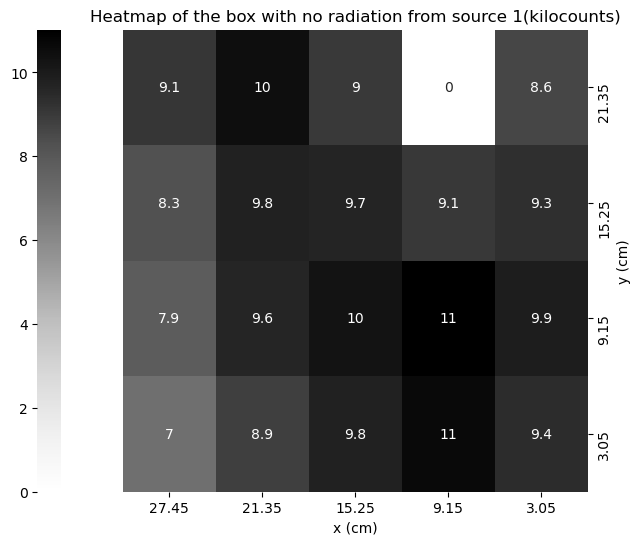

In [103]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box with no radiation from source 1(kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

Filtering out the next highest intensity coming from second source (x = 9.15, y = 9.15)

In [104]:
counts_source =  counts_sim[0][1]
counts_source_box = []

# every x, y position dominant source as origin
rx_positions = [-6.1, 0, 6.1, 12.2, 18.3]
ry_positions = [-6.1, 0, 6.1, 12.2]

# calculating intensity at every point in box coming from dominant source (intensity goes off with 1 / r^2)
for y in ry_positions:
    for x in rx_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_source_box.append(counts_source ** 2 / (r ** 2 + counts_source))

counts_source_box = np.array(counts_source_box)
counts_source_box = np.array(counts_source_box).reshape(4, 5)

In [105]:
counts = counts_sim - counts_source_box
counts = np.array(counts)
counts_sim = counts

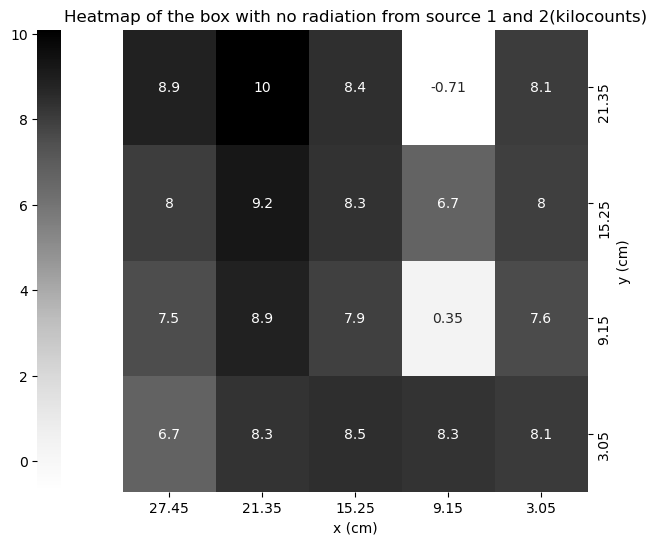

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box with no radiation from source 1 and 2(kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

Start simulation of intensity in box with found locations of sources (highest peaks)

In [107]:
counts_source_1 =  50 # kilo counts
counts_1 = []
counts_source_2 =  36 # kilo counts
counts_2 = []
counts_source_3 = 30
counts_3 = []

# positions for source 1, 2 and 3
r1x_positions = [-6.1, 0, 6.1, 12.2, 18.3] 
r1y_positions = [-18.3, -12.2, -6.1, 0]
r2x_positions = [-6.1, 0, 6.1, 12.2, 18.3]
r2y_positions = [-6.1, 0, 6.1, 12.2]
r3x_positions = [-18.3, -12.2, -6.1, 0, 6.1]
r3y_positions = [-18.3, -12.2, -6.1, 0]

for y in r1y_positions:
    for x in r1x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_1.append(counts_source_1 ** 2 / (r ** 2 + counts_source_1))

for y in r2y_positions:
    for x in r2x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_2.append(counts_source_2 ** 2 / (r ** 2 + counts_source_2))
        
for y in r3y_positions:
    for x in r3x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_3.append(counts_source_3 ** 2 / (r ** 2 + counts_source_3))
        

counts_1 = np.array(counts_1)
counts_1 = np.array(counts_1).reshape(4, 5)

counts_2 = np.array(counts_2)
counts_2 = np.array(counts_2).reshape(4, 5)

counts_3 = np.array(counts_3)
counts_3 = np.array(counts_3).reshape(4, 5)

counts = counts_1 + counts_2 + counts_3

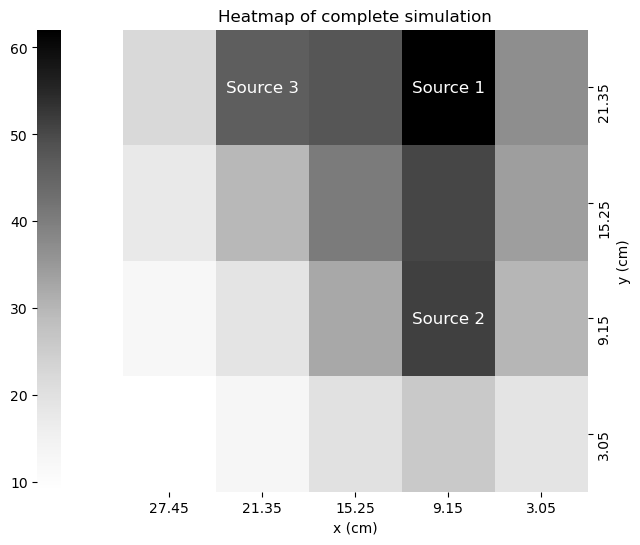

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=False, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of complete simulation")
text_coord = [
    (1.5, 1.5, "Source 2"), 
    (1.5, 3.5, "Source 1"),
    (3.5, 3.5, "Source 3")
]

# Plaats de tekst
for x, y, text in text_coord:
    plt.text(x, y, text, color="white", ha="center", va="center", fontsize=12)
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()